# $LiH$ experiments

In [1]:
try:
  import qiskit
  import qiskit_aer
  import qiskit_nature
  import qiskit_ibm_runtime
  import pyscf
  import pylatexenc
except:
  !pip install qiskit qiskit-aer qiskit-ibm-runtime qiskit_nature pyscf pylatexenc

# General imports
import numpy as np

# Qiskit Runtime
from qiskit.primitives import Estimator
from qiskit_nature.second_q.formats.molecule_info import MoleculeInfo

# SciPy minimizer routine
from scipy.optimize import minimize

# Plotting functions
import matplotlib.pyplot as plt

# Local imports
from src.moleculemanager import MoleculeManager
from src.helpers import *

In [2]:
# molecule definition
lih = MoleculeInfo(
  symbols=["Li", "H"],
  coords=([1.0, 0.0, 0.0], [0.0, 0.0, 0.0]),
  multiplicity=1,  # = 2*spin + 1
  charge=0,
)

molecule = MoleculeManager(lih, "$LiH$")

Number of particles : (2, 2)
Number of spatial orbitals : 6
Orbital energies : [-2.37089933 -0.31665704  0.07684843  0.15793876  0.15793876  0.61299931]


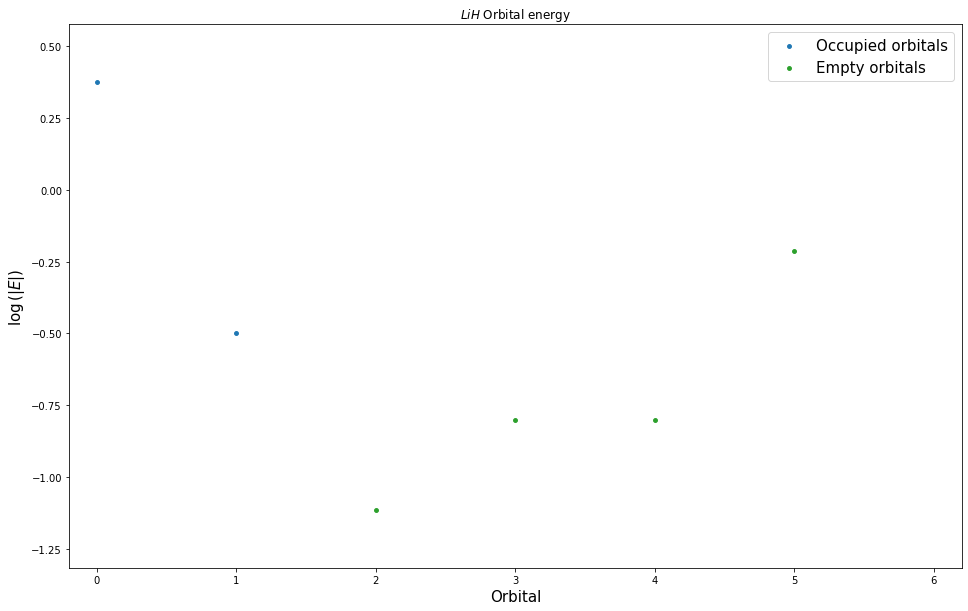

In [3]:
draw_orbitals(molecule.get_problem(), molecule.name)

## We can check which orbitals are removed 'by default'

Number of particles : (1, 1)
Number of spatial orbitals : 5
Orbital energies : [-0.31665704  0.07684843  0.15793876  0.15793876  0.61299931]


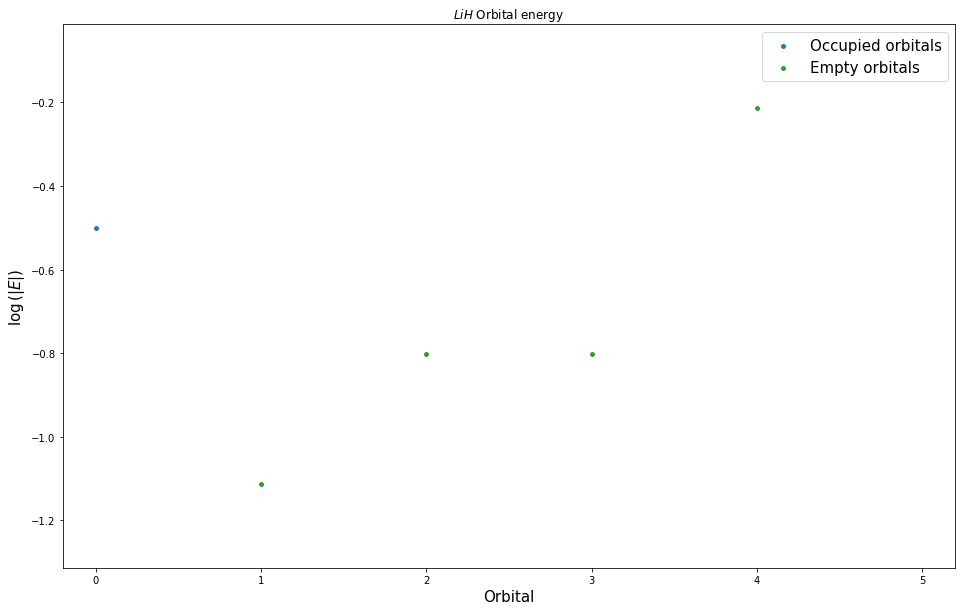

In [4]:
draw_orbitals(get_freezed_problem(molecule.get_problem()), molecule.name)

In [7]:
domain = np.linspace(0.8, 3, 20)

exact_energies = []
vqe_energies = []

for dist in domain:
  molecule.SetAtomCoords(([0.0, 0.0, 0.0], [dist, 0.0, 0.0]))
  exact_res, vqe_res = molecule.Experiment(
    optimizer_type=COBYLA(maxiter=45, tol=0.0001)
  )
  exact_energies.append(exact_res.total_energies)
  vqe_energies.append(vqe_res.total_energies)

19:56:22 FindGroundStateExactSolver started.
Exact result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -9.617794971801
  - computed part:      -1.148561639502
  - FreezeCoreTransformer extracted energy part: -8.469233332299
~ Nuclear repulsion energy (Hartree): 1.98441454095
> Total ground state energy (Hartree): -7.633380430851
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [1.5117809  0.0  0.0]
 
19:56:23 FindGroundStateExactSolver done.
19:56:23 FindGroundStateVQE started.
19:56:24 ansatz initialized
ansatz.depth = 1
num of qubits = 8
19:56:26 VQE compute_minimum_eigenvalue done
VQE result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -9.600184702186
  - computed part:      -1.130951369887
  - FreezeCoreTransformer extracted energy part: -8.469233332299
~ Nuclear repulsion energy (Hartree): 1.98441454095
> Total ground state energy (Hartree): -7.615770161236
 
=== MEASURED OBSERVA

## Plot comparison between VQE and ExactSolver

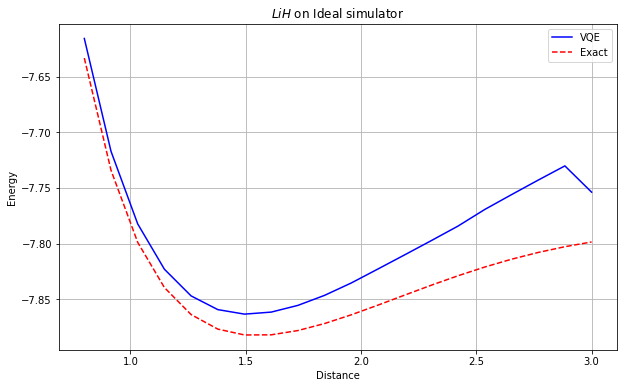

In [8]:
plot_comparisons(
  data=[vqe_energies, exact_energies],
  labels=['VQE', 'Exact'],
  domain=domain,
  colors=['blue', 'red'],
  linestyles=['solid', '--'],
  title=f'{molecule.name} on Ideal simulator'
)

## Plot VQE error

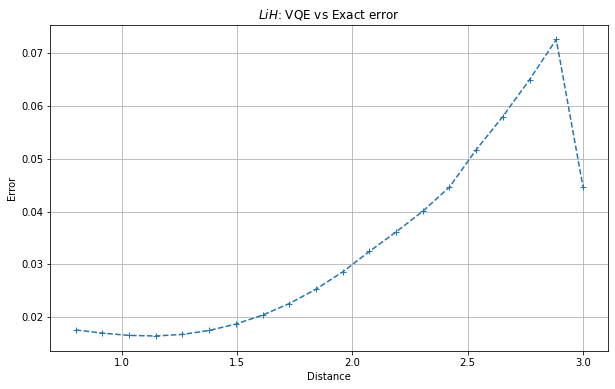

In [14]:
plot_error(
  vals_1=exact_energies,
  vals_2=vqe_energies,
  domain=domain,
  title=f'{molecule.name}: VQE vs Exact error'
)

Set's look closer...

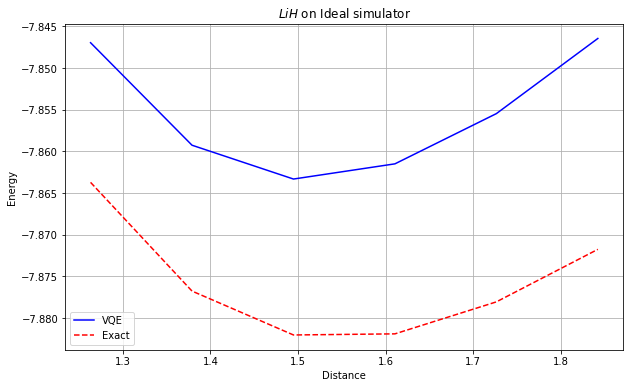

In [13]:
plot_comparisons(
  data=[vqe_energies, exact_energies],
  labels=['VQE', 'Exact'],
  domain=domain,
  colors=['blue', 'red'],
  linestyles=['solid', '--'],
  title=f'{molecule.name} on Ideal simulator',
  lower_bound=1.2,
  upper_bound=1.9
)

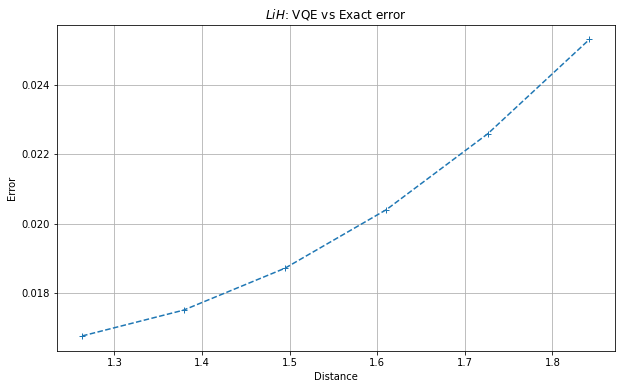

In [15]:
plot_error(
  vals_1=exact_energies,
  vals_2=vqe_energies,
  domain=domain,
  title=f'{molecule.name}: VQE vs Exact error',
  lower_bound=1.2,
  upper_bound=1.9
)

## Run on noisy simulator

In [17]:
noisy_domain = np.linspace(0.5, 1.5, 10)

noisy_vqe_energies = []
noisy_exact_energies = []

for dist in noisy_domain:
  print(f'{dist=}')
  molecule.SetAtomCoords(([0.0, 0.0, 0.0], [dist, 0.0, 0.0]))
  exact_res, vqe_res = molecule.Experiment(
    optimizer_type=COBYLA(maxiter=10, tol=0.0001),
    noisy_mode=True,
  )
  noisy_vqe_energies.append(vqe_res.total_energies)
  noisy_exact_energies.append(exact_res.total_energies)

dist=0.5
20:06:33 FindGroundStateExactSolver started.
Exact result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -10.222973145334
  - computed part:      -0.987444905498
  - FreezeCoreTransformer extracted energy part: -9.235528239836
~ Nuclear repulsion energy (Hartree): 3.17506326552
> Total ground state energy (Hartree): -7.047909879814
 
=== MEASURED OBSERVABLES ===
 
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.94486306  0.0  0.0]
 
20:06:34 FindGroundStateExactSolver done.
20:06:34 FindGroundStateVQE started.
20:06:36 ansatz initialized
ansatz.depth = 1
num of qubits = 8
20:12:46 VQE compute_minimum_eigenvalue done
VQE result:
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -8.372543294948
  - computed part:      0.862984944888
  - FreezeCoreTransformer extracted energy part: -9.235528239836
~ Nuclear repulsion energy (Hartree): 3.17506326552
> Total ground state energy (Hartree): -5.197480029428
 
=== MEASUR

## Compare VQE on noisy simulator vs Ideal simulator & Exact solver 

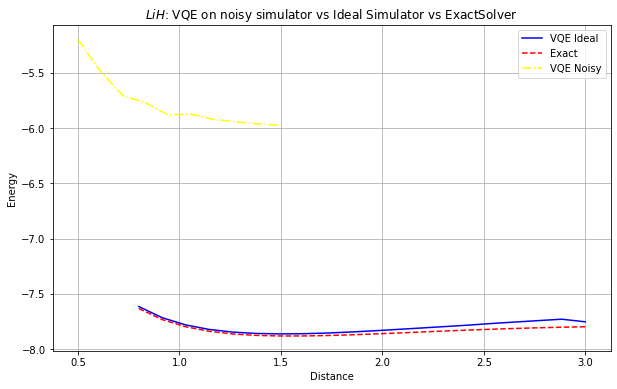

In [18]:
plot_comparisons(
  data=[(vqe_energies, domain), (exact_energies, domain),(noisy_vqe_energies, noisy_domain)],
  labels=['VQE Ideal', 'Exact', 'VQE Noisy'],
  colors=['blue', 'red', 'yellow'],
  linestyles=['solid', '--', 'dashdot'],
  title=f'{molecule.name}: VQE on noisy simulator vs Ideal Simulator vs ExactSolver'
)

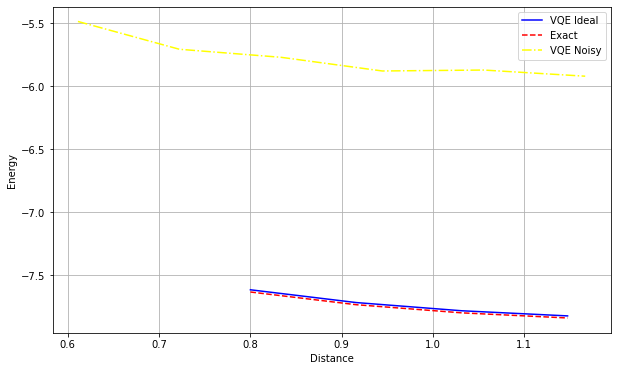

In [19]:
plot_comparisons(
  data=[(vqe_energies, domain), (exact_energies, domain),(noisy_vqe_energies, noisy_domain)],
  labels=['VQE Ideal', 'Exact', 'VQE Noisy'],
  colors=['blue', 'red', 'yellow'],
  linestyles=['solid', '--', 'dashdot'],
  lower_bound=0.5,
  upper_bound=1.25
)

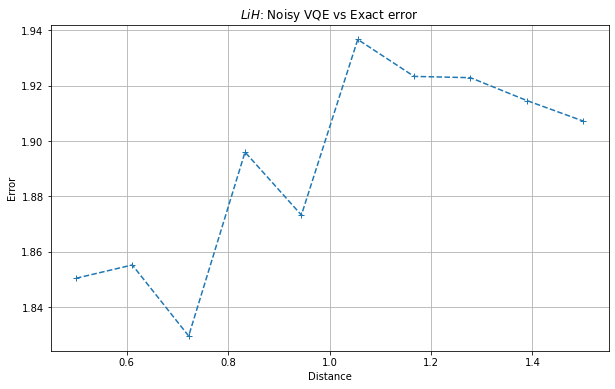

In [20]:
plot_error(
  vals_1=noisy_exact_energies,
  vals_2=noisy_vqe_energies,
  domain=noisy_domain,
  title=f'{molecule.name}: Noisy VQE vs Exact error'
)